# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [48]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [8]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [13]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014565467834472656 (+/- 0.0005160335030710646)
avg score time: 0.0030515193939208984 (+/- 0.0022987401657522696)
avg test score: 0.96 (+/- 0.024944382578492935)


In [14]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01833796501159668 (+/- 0.001753586111623613)
avg score time: 0.0073131084442138675 (+/- 0.000395473762110881)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [17]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0021850109100341798 (+/- 0.001776584168993852)
avg score time: 0.0022461414337158203 (+/- 0.00019501602126593707)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [18]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018254423141479494 (+/- 0.0004610183516530144)
avg score time: 0.00798492431640625 (+/- 0.0008880346113277802)
avg test score: 0.9496825396825397 (+/- 0.03245478665963931)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024925708770751954 (+/- 0.0007758997270237)
avg score time: 0.007357549667358398 (+/- 0.0005976902116119224)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024034786224365234 (+/- 0.004987022585467606)
avg score time: 0.016492271423339845 (+/- 0.002667306387384108)
avg test score: 0.9648657040832168 (+/- 0.009567008272362953)


#### SVC

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [25]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0020021438598632813 (+/- 0.0007059520355993794)
avg score time: 0.0005989551544189453 (+/- 0.00014793863419461386)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [26]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026095485687255858 (+/- 0.0019371066930555854)
avg score time: 0.0029886722564697265 (+/- 0.0002815876075618172)
avg test score: 0.9400000000000001 (+/- 0.013333333333333332)


##### 와인 데이터

In [27]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [28]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017818450927734376 (+/- 0.00015757535362904306)
avg score time: 0.0005212783813476563 (+/- 5.162246210081707e-05)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [29]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026506996154785155 (+/- 0.0012799265505295402)
avg score time: 0.003618621826171875 (+/- 0.0004956503010497644)
avg test score: 0.9553968253968254 (+/- 0.03325538883960416)


##### 유방암 데이터

In [30]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [33]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006045770645141601 (+/- 0.000546870469263214)
avg score time: 0.0013025760650634765 (+/- 8.656368914403457e-05)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [34]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.036958837509155275 (+/- 0.0027575958255611687)
avg score time: 0.007202816009521484 (+/- 0.0009724543797433565)
avg test score: 0.9630647414997672 (+/- 0.015190088205810635)


#### Decision Tree

##### 붓꽃 데이터

In [35]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [36]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016704082489013671 (+/- 0.0006906061617555652)
avg score time: 0.0005528926849365234 (+/- 0.00024688042976486735)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [37]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024488019943237304 (+/- 0.005228278218022056)
avg score time: 0.002269268035888672 (+/- 0.00017351494207350728)
avg test score: 0.9399999999999998 (+/- 0.04898979485566355)


##### 와인 데이터

In [41]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)


In [42]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.002068948745727539 (+/- 0.000479343156847824)
avg score time: 0.0007310390472412109 (+/- 0.0003825331825254861)
avg test score: 0.882063492063492 (+/- 0.05936932333527123)


In [43]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02381606101989746 (+/- 0.003697156730546564)
avg score time: 0.002357006072998047 (+/- 0.00010775243210928307)
avg test score: 0.9276190476190476 (+/- 0.06702360981860536)


##### 유방암 데이터

In [44]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [45]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.008703374862670898 (+/- 0.00029646027235994755)
avg score time: 0.000617361068725586 (+/- 3.637383104774097e-05)
avg test score: 0.9191274646793977 (+/- 0.011871648228774404)


In [46]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03343157768249512 (+/- 0.0014651191425856993)
avg score time: 0.0023705482482910155 (+/- 1.3014597411548361e-05)
avg test score: 0.9437509703462194 (+/- 0.022630017020147677)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [49]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [59]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [60]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001729583740234375 (+/- 0.0006479952170299565)
avg score time: 0.001971864700317383 (+/- 0.0006208030040946866)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [61]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017307758331298828 (+/- 0.0013168988955453579)
avg score time: 0.009270715713500976 (+/- 0.0003588337087690887)
avg test score: 0.44641260375845615 (+/- 0.2054504645077493)


##### 당뇨병 데이터

In [65]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [66]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017214775085449218 (+/- 0.0007823453115461059)
avg score time: 0.00264434814453125 (+/- 0.001280322051723391)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [67]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019416952133178712 (+/- 0.0020851729994222465)
avg score time: 0.009584426879882812 (+/- 0.0010796281431222395)
avg test score: 0.4109959501564172 (+/- 0.03318234365768075)


#### SVR

##### 보스턴 주택 가격 데이터

In [68]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [69]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.016169261932373048 (+/- 0.0016103616797218565)
avg score time: 0.00242466926574707 (+/- 3.934683867444042e-05)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [70]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0516608715057373 (+/- 0.00434893497556334)
avg score time: 0.008493518829345703 (+/- 0.00017740589173868287)
avg test score: 0.07994706965639856 (+/- 0.3682046225896848)


##### 당뇨병 데이터

In [71]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [72]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001960945129394531 (+/- 0.0007572918027801747)
avg score time: 0.0027720451354980467 (+/- 0.0005233839327485158)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [73]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018245983123779296 (+/- 0.0022488115564895756)
avg score time: 0.008992338180541992 (+/- 0.00029671770632734736)
avg test score: 0.395576012835608 (+/- 0.041126418624595366)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [74]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [75]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005093955993652343 (+/- 0.0013703528122349113)
avg score time: 0.0009001731872558594 (+/- 0.00017823606576997905)
avg test score: 0.08309148937398433 (+/- 0.9731781994947267)


In [76]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028215312957763673 (+/- 0.0016007566195712702)
avg score time: 0.002525472640991211 (+/- 0.00033645349428949964)
avg test score: 0.23652555718081425 (+/- 0.5678527053087545)


##### 당뇨병 데이터

In [77]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [78]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004132270812988281 (+/- 0.0015302994814247357)
avg score time: 0.0009777545928955078 (+/- 0.0006351967275260424)
avg test score: -0.1179108419670083 (+/- 0.12152232524889324)


In [79]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028094053268432617 (+/- 0.0027599131022217685)
avg score time: 0.002721881866455078 (+/- 0.00024548467021237586)
avg test score: 0.3844296188099402 (+/- 0.039403544591803626)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [80]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [83]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [84]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13236398696899415 (+/- 0.0082606083508117)
avg score time: 0.007947969436645507 (+/- 0.00037828764526793993)
avg test score: 0.96 (+/- 0.024944382578492935)


In [85]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1324483871459961 (+/- 0.006188548357711126)
avg score time: 0.0077129840850830075 (+/- 0.00012370709091584988)
avg test score: 0.9666666666666668 (+/- 0.03239417719358502)


In [87]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19450607299804687 (+/- 0.006713794484002224)
avg score time: 0.008874845504760743 (+/- 0.0005355237395282927)
avg test score: 0.9613569321533924 (+/- 0.019664087183305364)


### Random Forests 회귀

In [88]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [89]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.312729024887085 (+/- 0.009402381002771921)
avg score time: 0.007658815383911133 (+/- 0.0003256243271766262)
avg test score: 0.6073486472537712 (+/- 0.22738440930632717)


In [90]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.25707173347473145 (+/- 0.004647018495881912)
avg score time: 0.007469654083251953 (+/- 6.21165280756178e-05)
avg test score: 0.4164709604141664 (+/- 0.05300444076807024)


### Extremely Randomized Trees 분류

In [92]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [93]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08744683265686035 (+/- 0.0029224712103779744)
avg score time: 0.007760334014892578 (+/- 6.24952173591748e-05)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [94]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09195451736450196 (+/- 0.003912784681142204)
avg score time: 0.007875156402587891 (+/- 4.725270984609832e-05)
avg test score: 0.972063492063492 (+/- 0.017571077268107502)


In [95]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10960721969604492 (+/- 0.002513405901726974)
avg score time: 0.008945560455322266 (+/- 0.0002004198025576936)
avg test score: 0.9683434249340165 (+/- 0.016328734771401825)


### Extremely Randomized Trees 회귀

In [97]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [98]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17911143302917482 (+/- 0.005828528187413652)
avg score time: 0.0076539039611816405 (+/- 0.00020024801296950417)
avg test score: 0.6235031188284043 (+/- 0.2655941498405664)


In [99]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15580101013183595 (+/- 0.006091872163041062)
avg score time: 0.007959413528442382 (+/- 0.00013409856319723798)
avg test score: 0.43728198308913 (+/- 0.03790151450373876)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [138]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [139]:
n_classes = 3
n_estimator=30
cmap=plt.cm.RdYlBu
plot_step = .02
plot_step_coarser= .5
RANDOM_SEED = 13

In [140]:
iris= load_iris()
plot_idx= 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimator),
          ExtraTreesClassifier(n_estimators=n_estimator)]


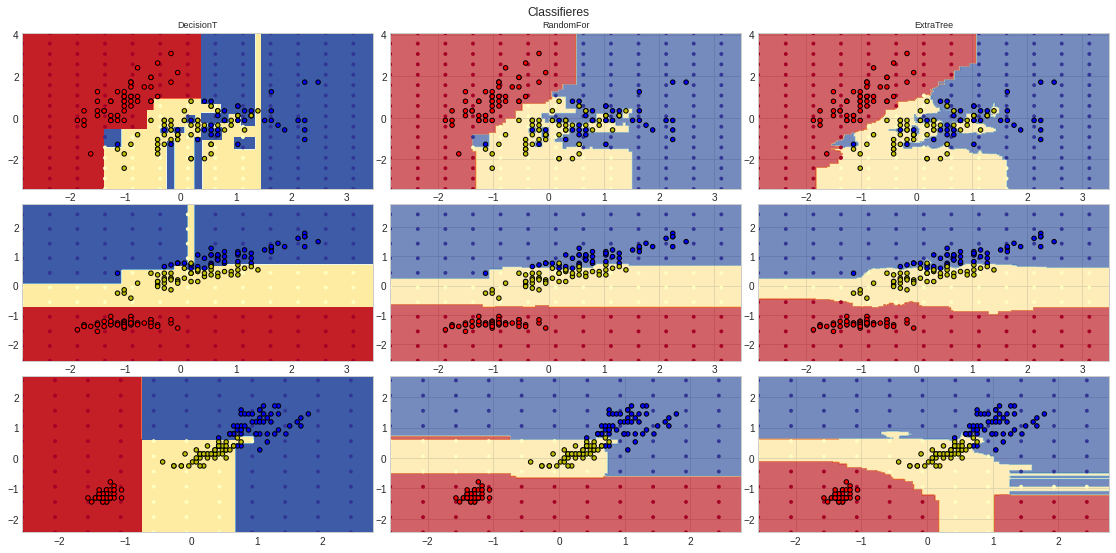

In [141]:
plt.figure(figsize=(16,8))

for pair in ([0,1], [0,2], [2,3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:len("classfier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                             yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15,
                            c = Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k', s=20)
    plot_idx += 1

plt.suptitle("Classifieres", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

In [152]:
plot_idx= 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimator),
          ExtraTreesRegressor(n_estimators=n_estimator)]

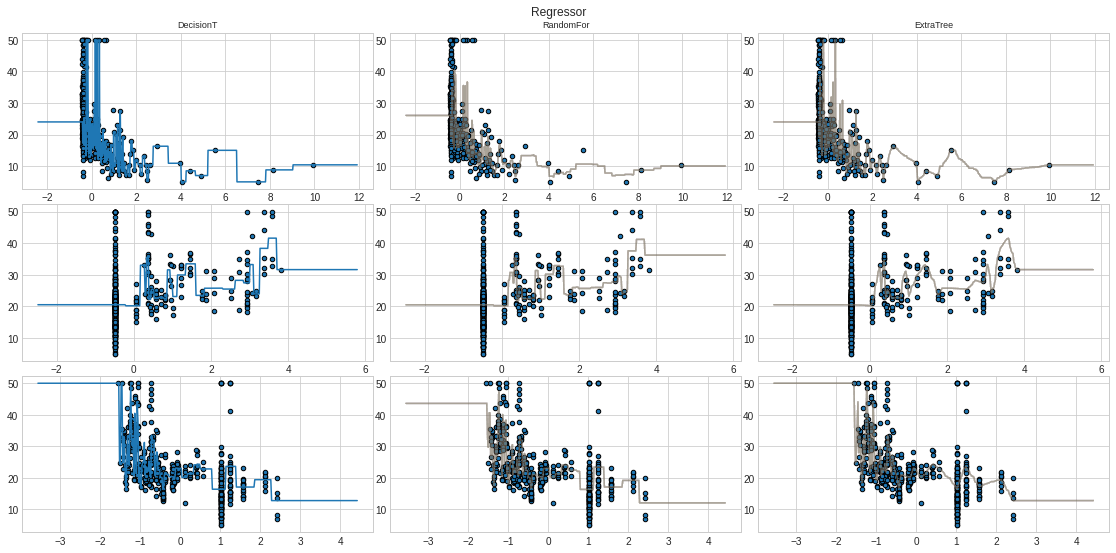

In [188]:
plt.figure(figsize=(16,8))

for pair in (0, 1, 2):
  for model in models:
    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:len("Regressor")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    
    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)
    
    plt.scatter(X, y, edgecolor='k', s=20)
    plot_idx += 1

plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [154]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [155]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [156]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07294735908508301 (+/- 0.011168663820057727)
avg score time: 0.006784820556640625 (+/- 0.0003025177069840451)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [157]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07562904357910157 (+/- 0.003404281194241348)
avg score time: 0.006653738021850586 (+/- 0.00020262983941341854)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [158]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15813851356506348 (+/- 0.006674829585405385)
avg score time: 0.007687520980834961 (+/- 0.0004392304773287491)
avg test score: 0.9718677224033534 (+/- 0.0195587047134823)


### AdaBoost 회귀

In [159]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [160]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09400124549865722 (+/- 0.004985271029775364)
avg score time: 0.003940296173095703 (+/- 0.00018895278734412104)
avg test score: 0.5700499298909179 (+/- 0.21740773081015266)


In [161]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08748340606689453 (+/- 0.007359019362712246)
avg score time: 0.003992223739624023 (+/- 0.0002945732162552294)
avg test score: 0.40541887112920855 (+/- 0.0497808680800432)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [164]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [166]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [167]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18547506332397462 (+/- 0.011761253950840544)
avg score time: 0.0009640693664550781 (+/- 4.826939436179897e-05)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [170]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21945157051086425 (+/- 0.005616548585825186)
avg score time: 0.0009210109710693359 (+/- 1.2296483000018718e-05)
avg test score: 0.9330158730158731 (+/- 0.03296317528191366)


In [169]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.42806072235107423 (+/- 0.006327400899436317)
avg score time: 0.0010430335998535157 (+/- 0.00011098853745681373)
avg test score: 0.9631268436578171 (+/- 0.02027905296701261)


### Gradient Tree Boosting 회귀

In [171]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [172]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12066488265991211 (+/- 0.005564777148440403)
avg score time: 0.000960540771484375 (+/- 2.6809276063017336e-05)
avg test score: 0.6839191428537568 (+/- 0.15024946629120806)


In [173]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09588313102722168 (+/- 0.005380555309651376)
avg score time: 0.0010622024536132812 (+/- 0.0001119482651736713)
avg test score: 0.40832346428248834 (+/- 0.07003445072970713)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [175]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [178]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1), ('naive',model2),('forest',model3)],
    voting='hard'
)

In [182]:
for model in (model1, model2, model3, vote_model):
  model_name= str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [193]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1), ('naive',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [194]:
for model in (model1, model2, model3, vote_model):
  model_name= str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [196]:
X = iris.data[:, [0,2]]
y = iris.target

In [198]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt',model1), ('knn',model2), ('svc',model3)], voting='soft', weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [199]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

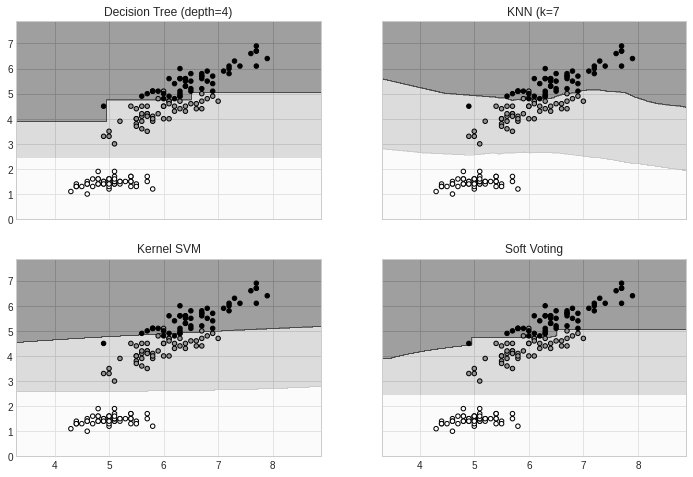

In [204]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7',
                          'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [211]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3= RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [213]:
for model in (model1 ,model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.64 (+/- 0.19) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [214]:
X =boston.data[:, 0].reshape(-1,1)
y = boston.target

In [215]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3= RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [216]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1,.1)

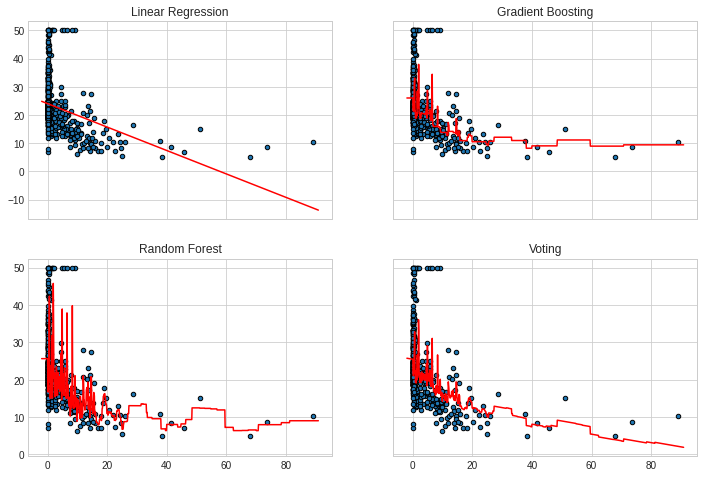

In [218]:
f, axarr = plt.subplots(2,2, sharex ='col', sharey ='row', figsize=(12,8))

for idx ,model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1 , 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [219]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor

In [220]:
estimators = [('ridge', Ridge()),
              ('lasso',Lasso()),
              ('svr', SVR())]

In [221]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators= estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [223]:
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y = boston.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1471409320831299 (+/- 0.0024972620742846645)
avg score time: 0.00303502082824707 (+/- 9.898792565798351e-05)
avg test score: 0.3225249348789395 (+/- 0.3391623548711214)


#### 회귀식 시각화

In [224]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [225]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3= SVR()
reg = StackingRegressor(
        estimators= estimators,
        final_estimator = GradientBoostingRegressor()
)
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

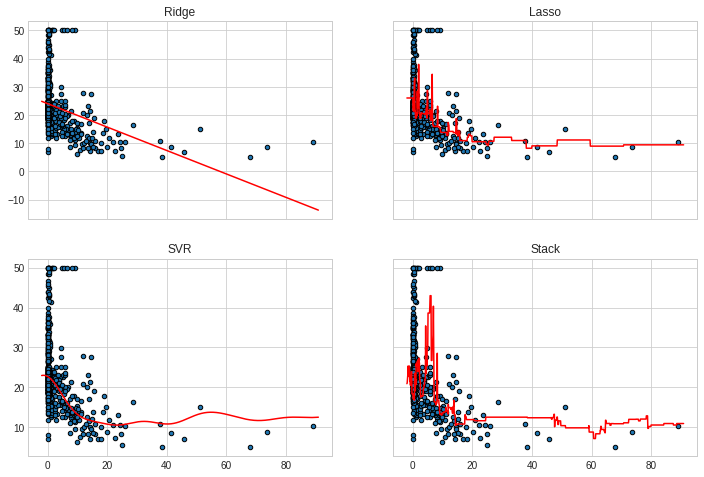

In [226]:
f, axarr = plt.subplots(2,2, sharex ='col', sharey ='row', figsize=(12,8))

for idx ,model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1 , 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [228]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc',SVC()),
              ('naive', GaussianNB())]

In [229]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [231]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5,
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.32808771133422854 (+/- 0.021259329922201066)
avg score time: 0.009636259078979493 (+/- 0.0005152804264074941)
avg test score: 0.9666666666666668 (+/- 0.029814239699997188)


#### 결정 경계 시각화

In [234]:
X = iris.data[:, [0,2]]
y = iris.target

In [235]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [236]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

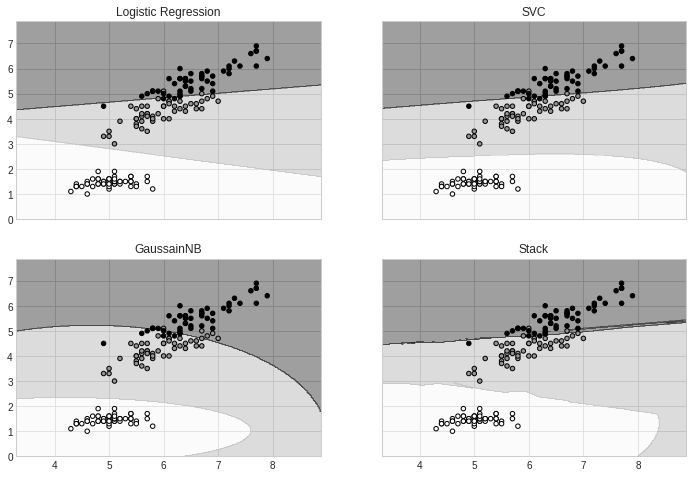

In [237]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                          'GaussainNB','Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()